In [136]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

In [71]:
questions = {
    'express_satisfaction': [
            "Why do you love this product?",
            "What makes you happy about using this product?",
            "Can you share your positive experience with this product?",
            "What aspects of this product met your expectations?",
            "Why would you recommend this product to others?",
            "What did you find most satisfying about this product?",
            "How has this product made a difference in your life?",
            "What features of this product were most beneficial to you?",
            "In what ways did this product exceed your expectations?",
            "Why do you think this product is superior to others?"
    ],
    'compare_products': [
            "How does this product stand up against its competitors?",
            "Can you compare this product with another you've used?",
            "What are the key differences between this product and its alternatives?",
            "In terms of quality, how does this product rank among its peers?",
            "What makes this product a better choice over others?",
            "Can you highlight the pros and cons between this and similar products?",
            "Why would one choose this product over another brand?",
            "What distinctions set this product apart from others in the market?",
            "How do the features of this product compare to those of its competitors?",
            "Why is this product considered superior/inferior to other options?"
    ],
    'instructions': [
            "Can you provide step-by-step instructions for using this product?",
            "What are the assembly instructions for this product?",
            "How should I care for and maintain this product?",
            "Are there any specific instructions for the first-time use of this product?",
            "What safety instructions should I be aware of for this product?",
            "Could you detail the cleaning instructions for this product?",
            "Are there special instructions for storing this product?",
            "How do I set up this product correctly?",
            "What are the instructions for troubleshooting common issues with this product?",
            "Can you explain how to use this product for the best results?"
    ],
    'usage': [
            "How often should this product be used?",
            "In what situations is this product most useful?",
            "Can this product be used daily?",
            "What are the best practices for using this product?",
            "Who is the target user of this product?",
            "What are the most common uses for this product?",
            "Can you provide examples of how to use this product?",
            "Is this product suitable for outdoor use?",
            "How long can I use this product before it needs to be replaced?",
            "What are some unexpected ways to use this product?"
    ],
    'express_dissatisfaction': [
            "What disappointed you about this product?",
            "Where did this product fail to meet your expectations?",
            "Can you share your concerns about this product?",
            "What aspects of the product were unsatisfactory?",
            "Why wouldn't you recommend this product to others?",
            "What was your biggest issue with this product?",
            "How did this product fall short of what was advertised?",
            "In what ways did the product not work as you hoped?",
            "What improvements do you suggest for this product?",
            "Why was this product a letdown for you?"
    ],
    'pricing': [
            "Do you feel this product is worth its price?",
            "How do you justify the cost of this product?",
            "Is this product a good value for the money?",
            "What are your thoughts on the product's pricing?",
            "Compared to similar products, is this priced fairly?",
            "Would you consider this product overpriced?",
            "How does the price affect your perception of this product?",
            "Is the quality of this product reflective of its price point?",
            "Would you purchase this product again at its current price?",
            "How does the pricing compare to the benefits you received?"
    ],
    'ask_result': [
            "What outcomes can I expect from using this product?",
            "How quickly does this product show results?",
            "Are the results from this product long-lasting?",
            "What specific results did you achieve with this product?",
            "How effective is this product in delivering its promised results?",
            "Can you share before and after results of using this product?",
            "What kind of improvements did you notice after using this product?",
            "Did this product meet your expectations in terms of results?",
            "How does this product perform compared to others you've tried?",
            "What feedback have others given about the results of this product?"
    ],
    'features': [
            "What unique features does this product offer?",
            "Can you highlight the top features of this product?",
            "How do the features of this product improve its usability?",
            "What are the most innovative features of this product?",
            "How do the product's features stand out from the competition?",
            "Which feature of this product was most beneficial to you?",
            "How do the features justify the price of the product?",
            "What features would you like to see added or improved?",
            "How do the product's features address common user needs?",
            "Which of the product's features did you find most compelling?"
    ],
    'verify_authenticity': [
            "How can I ensure that this product is genuine?",
            "What are the signs of authenticity I should look for in this product?",
            "Can you provide proof of authenticity for this product?",
            "What measures are in place to prevent counterfeit versions of this product?",
            "How does the company guarantee the authenticity of its products?",
            "Where can I verify the serial number or authenticity code of this product?",
            "What should I do if I doubt the authenticity of the product I received?",
            "How can I differentiate between a genuine and a fake product?",
            "What certifications or markings confirm this product's authenticity?",
            "Is there an official channel or website to verify this product's authenticity?"
    ],
    'ask_usage':[
            "How should I properly use this product for optimal results?",
            "Can you provide some tips on making the most out of this product?",
            "What's the recommended frequency of use for this product?",
            "Are there any special conditions under which this product should be used?",
            "What are the best practices for using this product in daily routines?",
            "Can this product be used in combination with others for better results?",
            "Is there any specific time of day that is best for using this product?",
            "How can I maximize the effectiveness of this product through proper usage?",
            "What should I avoid doing while using this product?",
            "Are there any user tips that can enhance my experience with this product?"
    ],
    'ask_quantity': [
            "How much of this product should I use at one time?",
            "What is the recommended dosage or quantity for this product?",
            "Can you advise on the quantity needed for a single use?",
            "Is there a limit to how much of this product I can use safely?",
            "How does the quantity used affect the product's effectiveness?",
            "What's the optimal amount of this product for achieving the best results?",
            "Can you clarify the serving size for this product?",
            "What quantity of this product constitutes overuse?",
            "How do I measure the correct quantity of this product for use?",
            "Does using a larger quantity of this product improve results?"
    ],
    'ask_packaging': [
            "What type of packaging does this product come in?",
            "Is the packaging of this product eco-friendly?",
            "Can you describe the size and material of the product's packaging?",
            "How does the packaging ensure the product remains fresh and effective?",
            "Is the product packaging recyclable or reusable?",
            "Does the packaging provide adequate protection during shipping?",
            "Are there any unique features of the product's packaging I should know about?",
            "How user-friendly is the packaging for this product?",
            "What measures are taken to make the packaging secure?",
            "Does the packaging include instructions for proper use and storage of the product?"
    ],
    'ask_shipping': [
            "What are the shipping options available for this product?",
            "How long does it typically take for this product to be delivered?",
            "Can you track the shipping progress of this product?",
            "Are there any shipping restrictions or limitations I should be aware of?",
            "Is expedited shipping available for urgent orders of this product?",
            "How is the product packaged for shipping to ensure it arrives in good condition?",
            "What are the shipping costs associated with this product?",
            "Do you offer international shipping for this product?",
            "How can I change the shipping address after placing an order for this product?",
            "What is the return policy for this product in case of shipping damage?"
    ],
    'recommendation': [
            "Can you recommend a product that fits my specific needs?",
            "Based on my preferences, which product would you suggest?",
            "What are the most highly recommended products in this category?",
            "Could you recommend a product that offers the best value for money?",
            "What products do customers frequently recommend for beginners?",
            "Are there any products you would recommend for sensitive skin?",
            "Can you suggest a product that complements the one I'm currently using?",
            "What are your top recommendations for eco-friendly products?",
            "Based on positive feedback, which product would you recommend?"
    ],
    'ask_features': [
            "Can you outline the main features of this product?",
            "What innovative features does this product offer?",
            "How do the features of this product enhance user experience?",
            "Are there any unique selling points in the product's features?",
            "What are the technical specifications and features of this product?",
            "Can you describe the design features of this product?",
            "What safety features are included in this product?",
            "How do the features of this product compare to similar items?",
            "What are the energy-saving features of this product?",
            "Can you explain the customizable features of this product?"
    ],
    'return_and_refund': [
            "What's the process for requesting a return and refund for this product?",
            "How can I return the product if I'm not satisfied?",
            "What conditions apply to the product's return and refund policy?",
            "Is it possible to get a full refund for this product?",
            "How long do I have to decide if I want to return the product?",
            "Who covers the return shipping costs for this product?",
            "What documentation do I need to provide for a return and refund?",
            "Can I exchange the product instead of getting a refund?",
            "How soon can I expect my refund after returning the product?",
            "Are there any restocking fees for returning this product?"
    ],
    'report_side_effect': [
            "What should I do if I notice a side effect after using this product?",
            "Have any side effects been reported by other users of this product?",
            "Can you describe any known side effects associated with this product?",
            "Are the side effects of this product temporary or long-lasting?",
            "How common are side effects when using this product?",
            "What precautions can I take to minimize the risk of side effects?",
            "Is there a way to report side effects I've experienced with this product?",
            "What should I monitor for in terms of side effects when using this product?",
            "Have any serious side effects been linked to this product?",
            "What steps does the company take to investigate reported side effects?"
    ]
}

In [112]:
df = pd.read_csv('processed_data/intent_processed_amazon_reviews_us_Beauty.tsv', sep= '\t')

In [86]:
df.product_title.value_counts()[-50:]

product_title
cardiochek home blood analyzer                                                                                                                                                    2
hibiclens surgical scrub 32oz                                                                                                                                                     2
optimum nutrition essential amino energy, fruit fusion, 30 servings, 9.5 ounce (pack of 3)                                                                                        2
vitanica - chaste tree berry - vitex extract plus - 60 vegetarian capsules                                                                                                        2
chest-a-peel heart pillow                                                                                                                                                         2
silver wire - pure silver wire for use with the colloidal silver generator, 0.999 pure

In [10]:
df[df.product_title == 'pedinova iii foot & nail care system']

,customer_id,review_id,product_id,product_title,product_category,star_rating,helpful_votes,vine,verified_purchase,review_sentence,intent
421381,29213518,rngqk9jei7xff,b00563ouzc,pedinova iii foot & nail care system,beauty,5.0,16.0,n,y,five stars.,express_satisfaction
421382,29213518,rngqk9jei7xff,b00563ouzc,pedinova iii foot & nail care system,beauty,5.0,16.0,n,y,excellent product for a senior citizen like me...,usage


<AxesSubplot:ylabel='Density'>

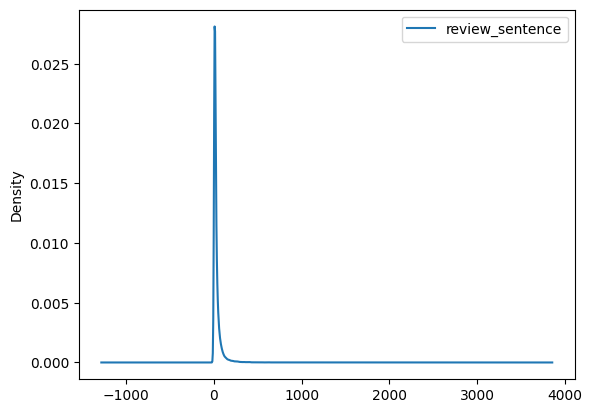

In [87]:
df[['product_title','review_sentence']].groupby(by= 'product_title').count().plot.kde()

In [88]:
tmp = df[['product_title','review_sentence']].groupby(by= 'product_title').count()
tmp[tmp.review_sentence > 10]

,review_sentence
product_title,
"""""""bio-silver"""" ultra colloidal silver spray, 240 ppm, 2 oz (59.14 ml)""",27
"""""""blue max"""" reusable/washable waterproof bed pad, 34"""" x 36""""""",68
"""""""d"""" size battery shell adapter for aa batteries by lenmar""",26
"""""""egg crate"""" convoluted ﻿hemorrhoid cushion""",11
"""""""ijoy active 2.0"""" perfect fit massage chair""",32
...,...
"zzzquil nighttime sleep aid, warming berry flavor liquid, twin pack 2x12 oz",19
~shave ready~ 10 piece set shaving straight razor 6/8,18
®befit24 - umbilical hernia belt - abdominal hernia binder - made in europe - 5 year warranty,11


In [89]:
tmp = df[['product_title', 'review_sentence']].groupby(by= 'product_title').filter(lambda x: len(x['review_sentence'].values) > 10)

In [90]:
tmp

,product_title,review_sentence
2,core products soothe-a-ciser natural foam trac...,painsaver!.
3,core products soothe-a-ciser natural foam trac...,this soothe-a-ciser really works for relieving...
4,core products soothe-a-ciser natural foam trac...,.no bad smells.good quality item.and so simple...
5,core products soothe-a-ciser natural foam trac...,"even thought my pinched nerve is gone, i can t..."
6,core products soothe-a-ciser natural foam trac...,it helps your back and neck to properly align ...
...,...,...
1226551,zinc oxide powder - 1 lb. - non nano - in qual...,when anyone in the family came down with an ir...
1226552,zinc oxide powder - 1 lb. - non nano - in qual...,"considering the price, its purity and how very..."
1226553,organic cassava root - fertility supplement fo...,pregnant!.
1226554,organic cassava root - fertility supplement fo...,i got pregnant the 2nd month after using this ...


In [91]:
df = df[df.product_title.isin(tmp.product_title.unique())]

In [92]:
df.reset_index(drop= True, inplace= True)

In [93]:
df.to_csv('processed_data/intent_processed_amazon_reviews_us_Health.tsv', sep= '\t',index=False)

In [94]:
df

,customer_id,review_id,product_id,product_title,product_category,star_rating,helpful_votes,vine,verified_purchase,review_sentence,intent
0,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,painsaver!.,express_dissatisfaction
1,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,this soothe-a-ciser really works for relieving...,verify_authenticity
2,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,.no bad smells.good quality item.and so simple...,usage
3,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,"even thought my pinched nerve is gone, i can t...",express_dissatisfaction
4,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,it helps your back and neck to properly align ...,express_dissatisfaction
...,...,...,...,...,...,...,...,...,...,...,...
1131094,39390969,r25k43vqxis850,b003igol8u,zinc oxide powder - 1 lb. - non nano - in qual...,health & personal care,5,66,n,y,when anyone in the family came down with an ir...,report_side_effect
1131095,39390969,r25k43vqxis850,b003igol8u,zinc oxide powder - 1 lb. - non nano - in qual...,health & personal care,5,66,n,y,"considering the price, its purity and how very...",ask_quantity
1131096,50925874,r3jrfttdafgn6j,b009ks9jmi,organic cassava root - fertility supplement fo...,health & personal care,5,78,n,y,pregnant!.,express_satisfaction
1131097,50925874,r3jrfttdafgn6j,b009ks9jmi,organic cassava root - fertility supplement fo...,health & personal care,5,78,n,y,i got pregnant the 2nd month after using this ...,recommendation


In [95]:
def make_QnA(row):
    intent = row['intent']
    answer = str(int(row['star_rating'])) + " stars " + row['review_sentence']
    question = random.choice(questions[intent])
    sample = row['product_title'] + " Question: " + question + " Answer: " + answer

    return sample

df['QnA'] = df.apply(lambda row: make_QnA(row), axis=1)

In [97]:
df.to_csv('training_data/QnA_intent_processed_amazon_reviews_us_Health.tsv', sep= '\t', index= False)

In [121]:
def make_QnA_grouped(group):
    intents = list(group.intent.unique())
    review = " ".join(group.review_sentence.values)

    for intent in intents:
        question = random.choice(questions[intent])
        answer = str(int(group['star_rating'].values[0])) + " stars " + review
        sample = group['product_title'].values[0] + " Question: " + question + " Answer: " + answer

    return sample

data = df.groupby(by= 'review_id').apply(lambda group: make_QnA_grouped(group))

C:\Users\91962\AppData\Local\Temp\ipykernel_15156\3711002034.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = df.groupby(by= 'review_id').apply(lambda group: make_QnA_grouped(group))


In [122]:
data = pd.DataFrame(data, columns= ['QnA'])
data.reset_index(inplace= True)

In [124]:
data.to_csv('training_data/Full_review_QnA_intent_processed_amazon_reviews_us_Beauty.tsv', sep= '\t', index= False)

In [123]:
data

,review_id,QnA
0,r100254f43eiyp,art of air professional airbrush cosmetic make...
1,r1002vs9td8lc4,"life-flo organic pure sesame oil, 16 ounce Que..."
2,r1004f6y4dlpq0,best-selling hyaluronic acid serum for skin-- ...
3,r100a7da42getf,"thunder ridge emu products pure emu oil, 8 oun..."
4,r100apvpec1byv,10-28 inch 100% raw virgin brazilian remy huma...
...,...,...
71026,rzzw7zggcbmwk,surya henna henna cream golden brown Question:...
71027,rzzy4k01042xn,aztec secret indian healing clay deep pore cle...
71028,rzzypfxxnqu6,"primal pit paste natural deodorant, aluminum f..."
71029,rzzz6bhnnar4i,drformulas hairomega serum minoxidil foam topi...


In [128]:
df = pd.read_csv(r"C:\Users\91962\Downloads\Course Material\CS9873-BrainInspiredAI\training_data\QnA_intent_processed_amazon_reviews_us_Health.tsv", sep= '\t')
df.head()

,customer_id,review_id,product_id,product_title,product_category,star_rating,helpful_votes,vine,verified_purchase,review_sentence,intent,QnA
0,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,painsaver!.,express_dissatisfaction,core products soothe-a-ciser natural foam trac...
1,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,this soothe-a-ciser really works for relieving...,verify_authenticity,core products soothe-a-ciser natural foam trac...
2,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,.no bad smells.good quality item.and so simple...,usage,core products soothe-a-ciser natural foam trac...
3,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,"even thought my pinched nerve is gone, i can t...",express_dissatisfaction,core products soothe-a-ciser natural foam trac...
4,15053459,r2aqkuzbxmhl71,b000y4yo54,core products soothe-a-ciser natural foam trac...,health & personal care,5,61,n,y,it helps your back and neck to properly align ...,express_dissatisfaction,core products soothe-a-ciser natural foam trac...


In [137]:
text = ''
for row in tqdm(df.QnA.values):
    text += f'Context: {row}\n'

 38%|██████████████████████████▍                                          | 434108/1131099 [1:25:09<2:16:43, 84.96it/s]


KeyboardInterrupt: 

In [ ]:
with open('training_data/train.txt', 'w+') as f:
    f.write(text)
    